
# Train YOLOv8 Classification on Your Custom Dataset


## Steps

In this noteboook, we are going to cover:

- Before you start
- Install YOLOv8
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Export Model
- Download Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Runtime` -> `Change Runtime Type`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Thu May  1 20:49:38 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.247.01             Driver Version: 535.247.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:1E.0 Off |                    0 |
| N/A   32C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/teamspace/studios/this_studio


## Install YOLOv8
There are two ways to install YOLOv8
- From the source (for development)
- Via pip (recommended)

In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.122 🚀 Python-3.10.10 torch-2.7.0+cu128 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 30.9 GB RAM, 49.0/411.4 GB disk)


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="v9TzUXnGAA3HERPeyXBE")
project = rf.workspace("bigdata-xv5t7").project("skin-9nkfv")
version = project.version(1)
dataset = version.download("folder")
                


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to skin-1 in folder:: 100%|██████████| 12950/12950 [00:02<00:00, 5261.64it/s]


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

To prepare the custom data for classification using YOLO v8, Ensure that your dataset is structured as described below: You should have separate folders for train, test, and val, each containing subfolders for each class (e.g., ClassA, ClassB). Place the corresponding images for each class within their respective subfolders.

### Dataset Structure
```
Dataset
│
└───train
│   └───ClassA
│       │   ClassA_1.jpg
│       │   ClassA_2.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_1.jpg
│       │   ClassB_2.jpg
│       │   ...
│   └───...
└───test
│   └───ClassA
│       │   ClassA_9090.jpg
│       │   ClassA_9895.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_2343.jpg
│       │   ClassB_2312.jpg
│       │   ...
│   └───...
└───val
│   └───ClassA
│       │   ClassA_3070.jpg
│       │   ClassA_2845.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_2903.jpg
│       │   ClassB_2232.jpg
│       │   ...
│   └───...
```


## Custom Training

In [8]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8m-cls.pt data='skin-1' epochs=50 imgsz=640

using dhist requires you to install the `pickleshare` library.


/teamspace/studios/this_studio
Ultralytics 8.3.122 🚀 Python-3.10.10 torch-2.7.0+cu128 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=skin-1, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

## Validate Custom Model

In [9]:
%cd {HOME}

!yolo task=classify mode=val model={HOME}/runs/classify/train3/weights/best.pt data='skin-1'

/teamspace/studios/this_studio
Ultralytics 8.3.122 🚀 Python-3.10.10 torch-2.7.0+cu128 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,767,780 parameters, 0 gradients, 41.6 GFLOPs
train: /teamspace/studios/this_studio/skin-1/train... found 9053 images in 4 classes ✅ 
val: /teamspace/studios/this_studio/skin-1/val... found 2587 images in 4 classes ✅ 
test: /teamspace/studios/this_studio/skin-1/test... found 1293 images in 4 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1379.5±344.7 MB/s, size: 29.9 KB)
val: Scanning /teamspace/studios/this_studio/skin-1/val... 2587 images, 0 corrup
               classes   top1_acc   top5_acc: 100%|██████████| 162/162 [00:31<00
                   all       0.92          1
Speed: 0.9ms preprocess, 10.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
💡 Learn more at https://docs.ultralytics.com/modes/val


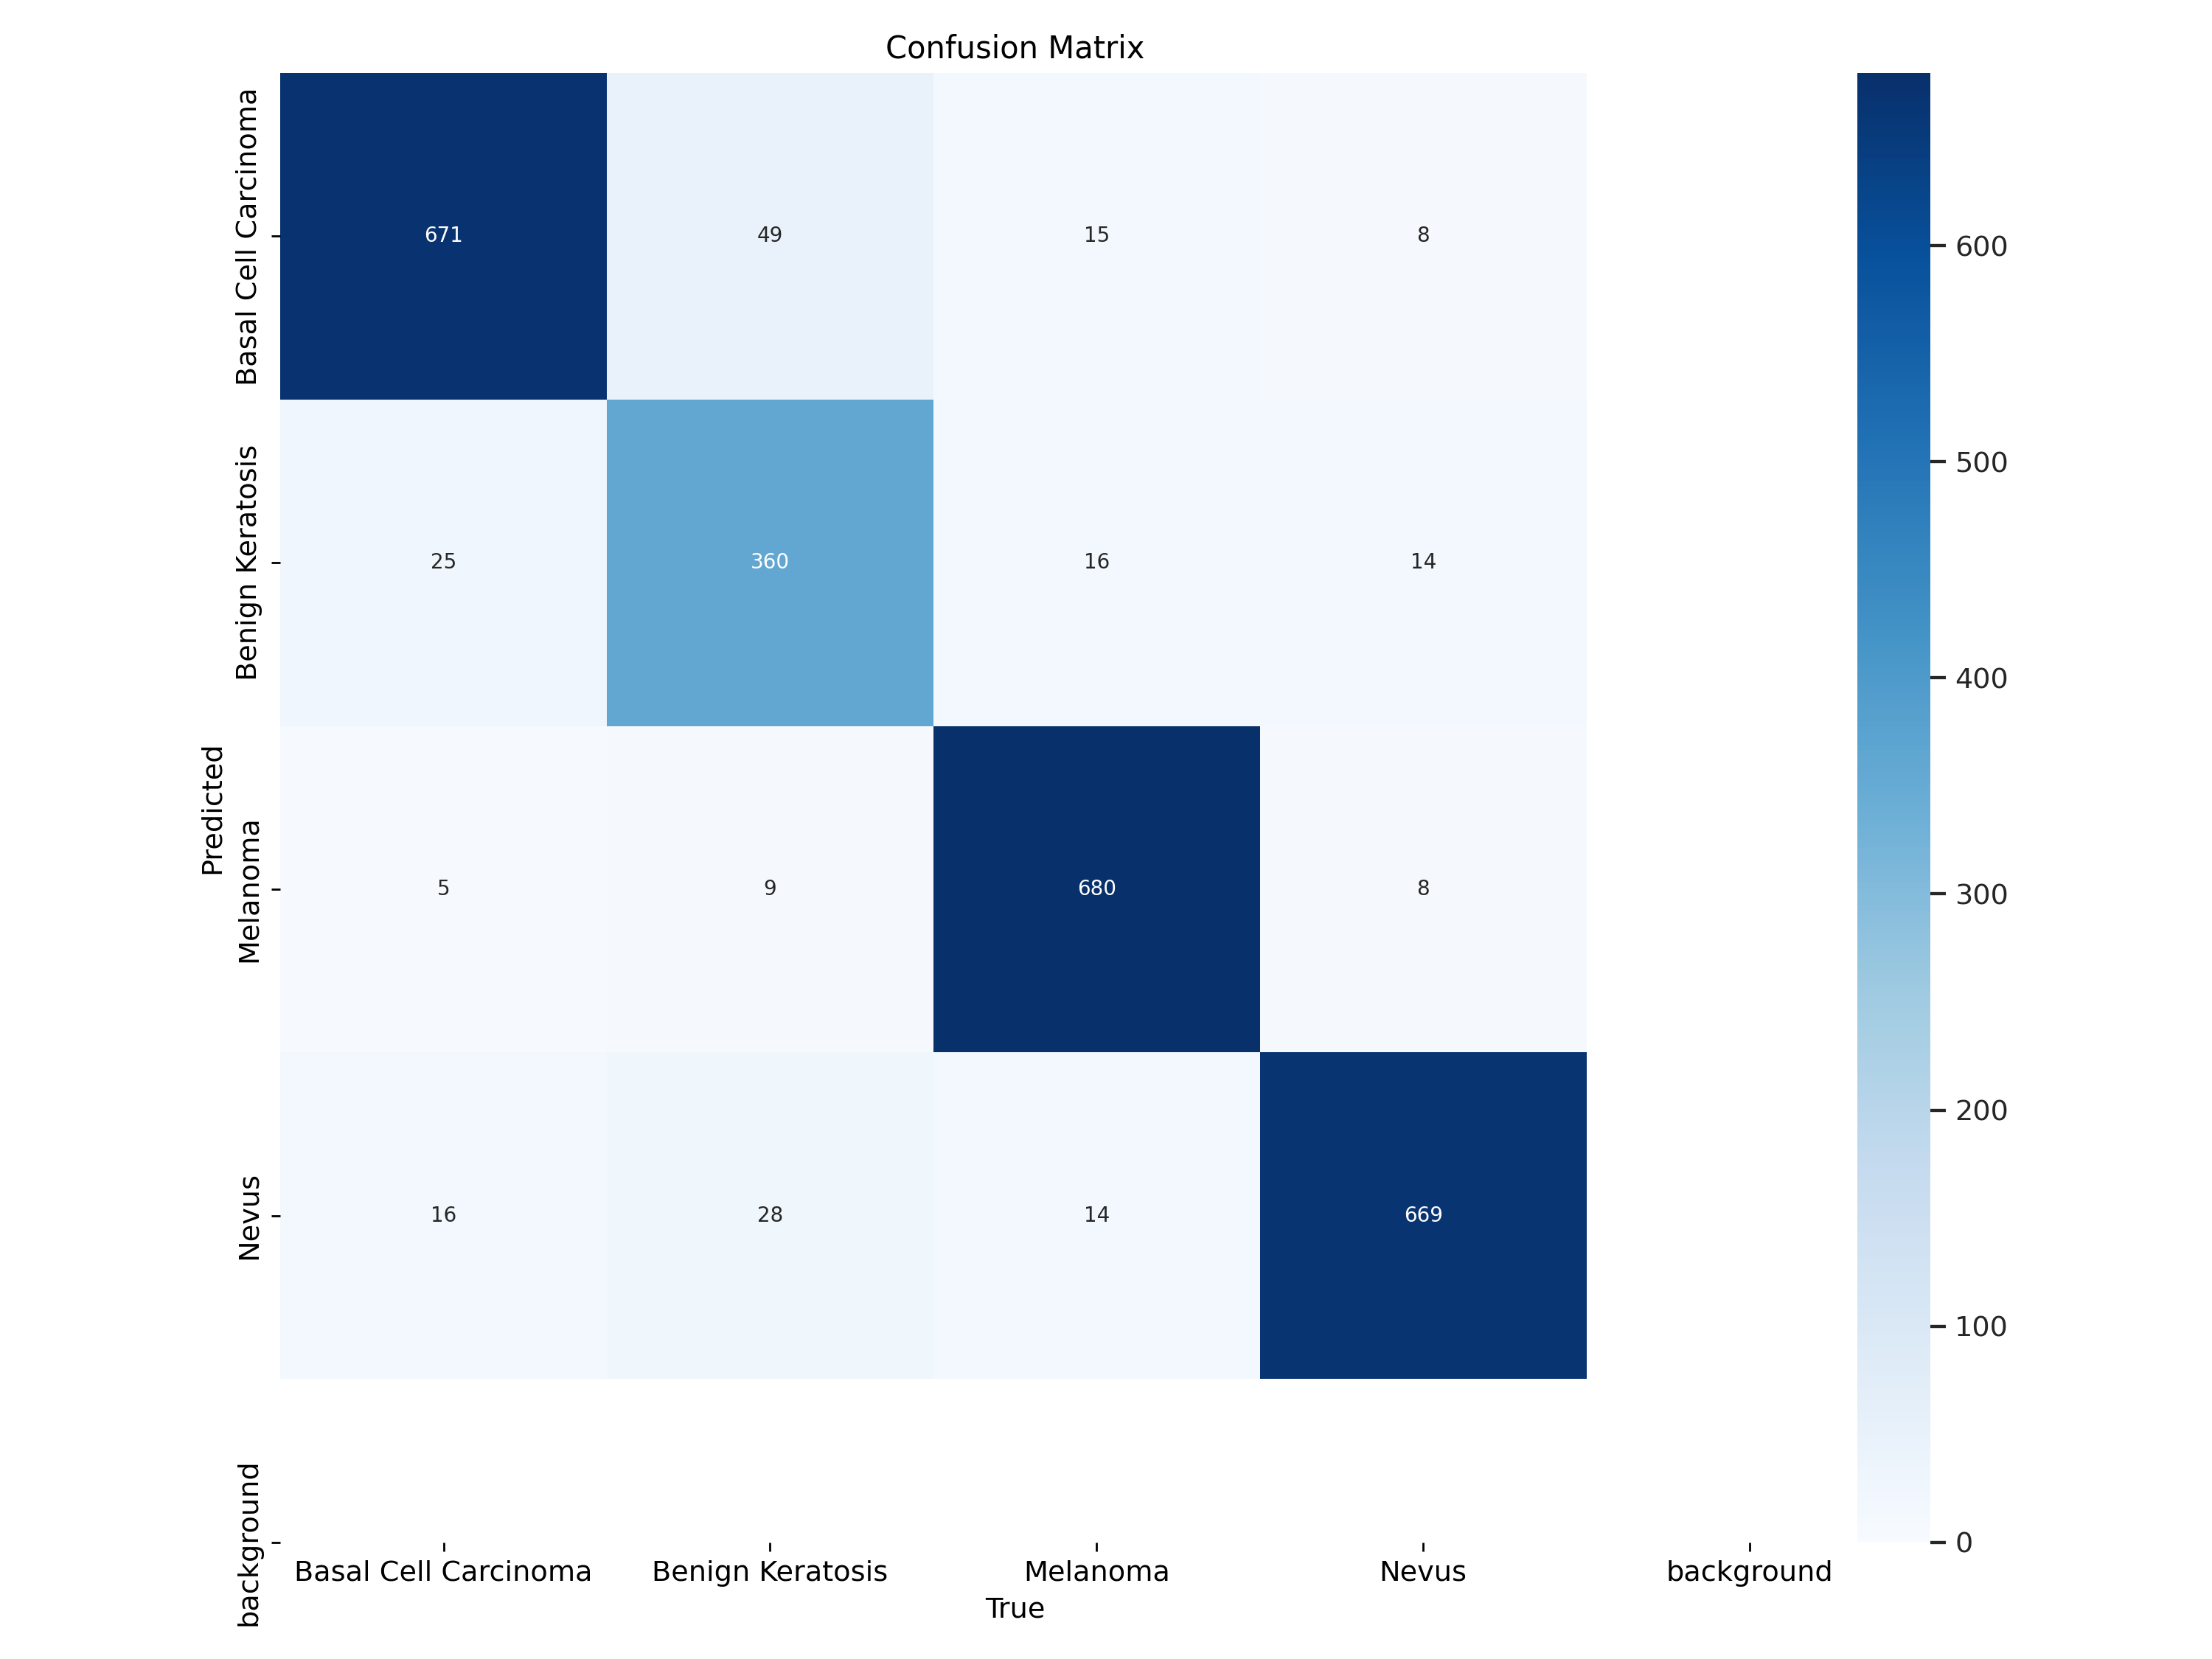

In [10]:
Image(filename=f'{HOME}/runs/classify/val/confusion_matrix.png')

## Inference with Custom Model


✅ Test Accuracy: 91.65%

📊 Classification Report:
                      precision    recall  f1-score   support

Basal Cell Carcinoma       0.89      0.93      0.91       358
    Benign Keratosis       0.87      0.78      0.82       223
            Melanoma       0.96      0.96      0.96       362
               Nevus       0.92      0.95      0.94       350

            accuracy                           0.92      1293
           macro avg       0.91      0.90      0.91      1293
        weighted avg       0.92      0.92      0.92      1293



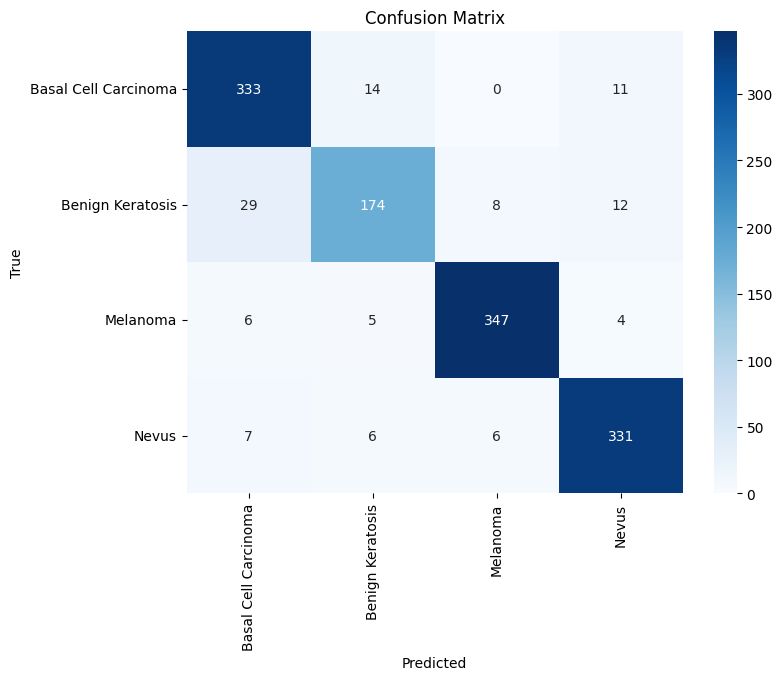

In [6]:
from ultralytics import YOLO
import os
from glob import glob
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = YOLO(f"{HOME}/runs/classify/train3/weights/best.pt")

# Test directory path
test_dir = os.path.join(HOME, "skin-1", "test")

# Collect all test images
image_paths = glob(f"{test_dir}/**/*.jpg", recursive=True)  # Adjust extension if needed

# Prepare lists for evaluation
true_labels = []
predicted_labels = []

# Get class name to index mapping
class_names = sorted(os.listdir(test_dir))  # class folder names
name_to_index = {name: idx for idx, name in enumerate(class_names)}
index_to_name = {idx: name for name, idx in name_to_index.items()}

# Predict for each image
for img_path in image_paths:
    true_class = os.path.basename(os.path.dirname(img_path))
    true_labels.append(name_to_index[true_class])

    results = model.predict(img_path, verbose=False)
    pred_idx = results[0].probs.top1
    predicted_labels.append(pred_idx)

# Compute accuracy
acc = accuracy_score(true_labels, predicted_labels)
print(f"\n✅ Test Accuracy: {acc * 100:.2f}%\n")

# Print classification report
print("📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



image 1/1 /teamspace/studios/this_studio/skin-1/test/Basal Cell Carcinoma/ISIC_0024431_jpg.rf.5b00ead1de3b83905d9bea25a0b9ed43.jpg: 640x640 Nevus 0.54, Basal Cell Carcinoma 0.46, Benign Keratosis 0.00, Melanoma 0.00, 9.8ms
Speed: 8.0ms preprocess, 9.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Image: ISIC_0024431_jpg.rf.5b00ead1de3b83905d9bea25a0b9ed43.jpg
  True Class:      Basal Cell Carcinoma
  Predicted Class: Nevus
  Confidence:      0.54



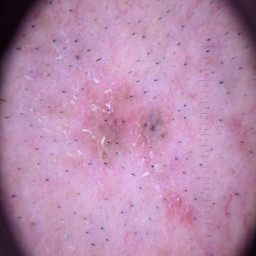


image 1/1 /teamspace/studios/this_studio/skin-1/test/Basal Cell Carcinoma/ISIC_0024829_jpg.rf.77bc695ff82bb3aac540545c661b822d.jpg: 640x640 Basal Cell Carcinoma 1.00, Benign Keratosis 0.00, Nevus 0.00, Melanoma 0.00, 9.8ms
Speed: 8.3ms preprocess, 9.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Image: ISIC_0024829_jpg.rf.77bc695ff82bb3aac540545c661b822d.jpg
  True Class:      Basal Cell Carcinoma
  Predicted Class: Basal Cell Carcinoma
  Confidence:      1.00



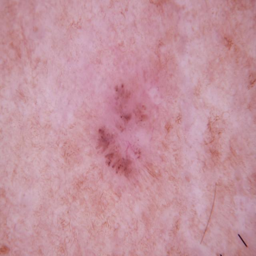


image 1/1 /teamspace/studios/this_studio/skin-1/test/Basal Cell Carcinoma/ISIC_0024833_jpg.rf.216267194f745fe281ae099c5949b4b6.jpg: 640x640 Basal Cell Carcinoma 1.00, Benign Keratosis 0.00, Nevus 0.00, Melanoma 0.00, 9.8ms
Speed: 8.5ms preprocess, 9.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Image: ISIC_0024833_jpg.rf.216267194f745fe281ae099c5949b4b6.jpg
  True Class:      Basal Cell Carcinoma
  Predicted Class: Basal Cell Carcinoma
  Confidence:      1.00



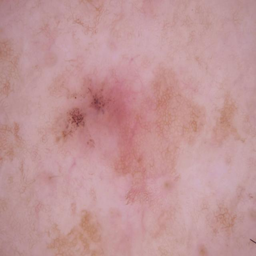


image 1/1 /teamspace/studios/this_studio/skin-1/test/Basal Cell Carcinoma/ISIC_0024848_jpg.rf.13d1e982e63d1a6df8857fa0cece96b4.jpg: 640x640 Basal Cell Carcinoma 1.00, Benign Keratosis 0.00, Nevus 0.00, Melanoma 0.00, 9.8ms
Speed: 9.3ms preprocess, 9.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Image: ISIC_0024848_jpg.rf.13d1e982e63d1a6df8857fa0cece96b4.jpg
  True Class:      Basal Cell Carcinoma
  Predicted Class: Basal Cell Carcinoma
  Confidence:      1.00



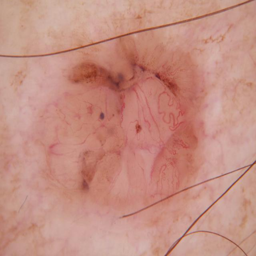


image 1/1 /teamspace/studios/this_studio/skin-1/test/Basal Cell Carcinoma/ISIC_0025617_jpg.rf.49acd788fd9e0c5913e9fafb88f16396.jpg: 640x640 Nevus 1.00, Basal Cell Carcinoma 0.00, Benign Keratosis 0.00, Melanoma 0.00, 9.7ms
Speed: 8.2ms preprocess, 9.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Image: ISIC_0025617_jpg.rf.49acd788fd9e0c5913e9fafb88f16396.jpg
  True Class:      Basal Cell Carcinoma
  Predicted Class: Nevus
  Confidence:      1.00



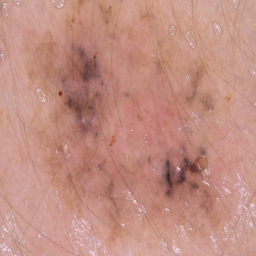


image 1/1 /teamspace/studios/this_studio/skin-1/test/Basal Cell Carcinoma/ISIC_0025793_jpg.rf.c93d781e0a54d3bf87774f103066517e.jpg: 640x640 Basal Cell Carcinoma 1.00, Nevus 0.00, Benign Keratosis 0.00, Melanoma 0.00, 9.8ms
Speed: 9.5ms preprocess, 9.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Image: ISIC_0025793_jpg.rf.c93d781e0a54d3bf87774f103066517e.jpg
  True Class:      Basal Cell Carcinoma
  Predicted Class: Basal Cell Carcinoma
  Confidence:      1.00



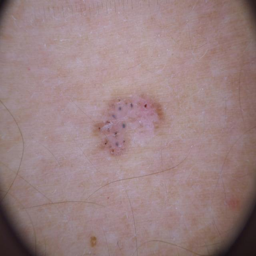


image 1/1 /teamspace/studios/this_studio/skin-1/test/Basal Cell Carcinoma/ISIC_0026074_jpg.rf.b726e5ce2b4e4cac91ebf65024210e23.jpg: 640x640 Basal Cell Carcinoma 0.98, Nevus 0.02, Benign Keratosis 0.00, Melanoma 0.00, 9.8ms
Speed: 8.1ms preprocess, 9.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Image: ISIC_0026074_jpg.rf.b726e5ce2b4e4cac91ebf65024210e23.jpg
  True Class:      Basal Cell Carcinoma
  Predicted Class: Basal Cell Carcinoma
  Confidence:      0.98



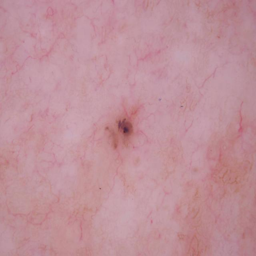


image 1/1 /teamspace/studios/this_studio/skin-1/test/Basal Cell Carcinoma/ISIC_0026192_jpg.rf.746cfff510bf8678a4fccbe502108076.jpg: 640x640 Basal Cell Carcinoma 1.00, Nevus 0.00, Benign Keratosis 0.00, Melanoma 0.00, 9.8ms
Speed: 9.3ms preprocess, 9.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Image: ISIC_0026192_jpg.rf.746cfff510bf8678a4fccbe502108076.jpg
  True Class:      Basal Cell Carcinoma
  Predicted Class: Basal Cell Carcinoma
  Confidence:      1.00



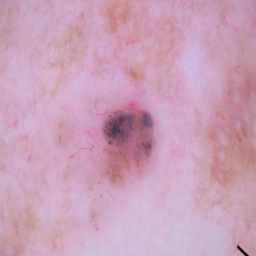


image 1/1 /teamspace/studios/this_studio/skin-1/test/Basal Cell Carcinoma/ISIC_0027004_jpg.rf.6e6a99064952a9d4c852200915c50dea.jpg: 640x640 Basal Cell Carcinoma 1.00, Nevus 0.00, Benign Keratosis 0.00, Melanoma 0.00, 9.8ms
Speed: 7.8ms preprocess, 9.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Image: ISIC_0027004_jpg.rf.6e6a99064952a9d4c852200915c50dea.jpg
  True Class:      Basal Cell Carcinoma
  Predicted Class: Basal Cell Carcinoma
  Confidence:      1.00



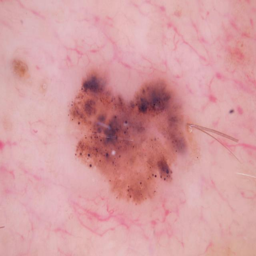


image 1/1 /teamspace/studios/this_studio/skin-1/test/Basal Cell Carcinoma/ISIC_0027281_jpg.rf.96acb423d448e2e94d255d2fb7893b5c.jpg: 640x640 Basal Cell Carcinoma 0.98, Benign Keratosis 0.02, Nevus 0.00, Melanoma 0.00, 9.8ms
Speed: 9.5ms preprocess, 9.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Image: ISIC_0027281_jpg.rf.96acb423d448e2e94d255d2fb7893b5c.jpg
  True Class:      Basal Cell Carcinoma
  Predicted Class: Basal Cell Carcinoma
  Confidence:      0.98



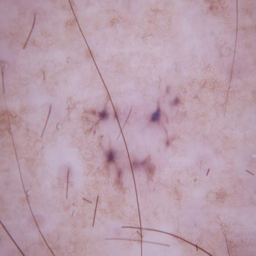

In [7]:
from ultralytics import YOLO
import os
from glob import glob
from PIL import Image
from IPython.display import display

# Load trained model
model = YOLO(f"{HOME}/runs/classify/train3/weights/best.pt")  # Update if path differs

# Path to your test set
test_dir = os.path.join(HOME, "skin-1", "test")

# Get all image paths
image_paths = glob(f"{test_dir}/**/*.jpg", recursive=True)  # Adjust image extension if needed

# Run predictions
for img_path in image_paths[:10]:  # Remove [:10] to test all
    # True class is the name of the parent folder
    true_class = os.path.basename(os.path.dirname(img_path))
    
    # Predict
    results = model.predict(img_path)
    pred = results[0].probs.top1
    confidence = results[0].probs.top1conf.item()
    predicted_class = model.model.names[pred]

    # Print results
    print(f"Image: {os.path.basename(img_path)}")
    print(f"  True Class:      {true_class}")
    print(f"  Predicted Class: {predicted_class}")
    print(f"  Confidence:      {confidence:.2f}\n")

    # Optionally display image
    display(Image.open(img_path).resize((256, 256)))


## Export Model

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                                     | `format=`          | Model                     |
|----------------------------------------------------------------------------|--------------------|---------------------------|
| [PyTorch](https://pytorch.org/)                                            | -                  | `yolov8n.pt`              |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)                    | `torchscript`      | `yolov8n.torchscript`     |
| [ONNX](https://onnx.ai/)                                                   | `onnx`             | `yolov8n.onnx`            |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)                     | `openvino`         | `yolov8n_openvino_model/` |
| [TensorRT](https://developer.nvidia.com/tensorrt)                          | `engine`           | `yolov8n.engine`          |
| [CoreML](https://github.com/apple/coremltools)                             | `coreml`           | `yolov8n.mlmodel`         |
| [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`      | `yolov8n_saved_model/`    |
| [TensorFlow GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`               | `yolov8n.pb`              |
| [TensorFlow Lite](https://www.tensorflow.org/lite)                         | `tflite`           | `yolov8n.tflite`          |
| [TensorFlow Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`          | `yolov8n_edgetpu.tflite`  |
| [TensorFlow.js](https://www.tensorflow.org/js)                             | `tfjs`             | `yolov8n_web_model/`      |
| [PaddlePaddle](https://github.com/PaddlePaddle)                            | `paddle`           | `yolov8n_paddle_model/`   |



In [ ]:
!yolo export model={HOME}/runs/classify/train/weights/best.pt format=onnx

### Download Model

In [ ]:
from google.colab import files
files.download('/content/runs/classify/train/weights/best.onnx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>